# **Predicting Customer Churn in a Telecommunications Company**

### *Importing all the necessary python libraries*

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,f1_score,confusion_matrix

### *1. Loading Data*

In [6]:
df = pd.read_csv('/content/Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### *2. Exploratory Data Analysis*

In [8]:
df.shape

(7043, 21)

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df['TotalCharges'].isna().sum()

11

*2.1 Checking Skewness for TotalCharges*

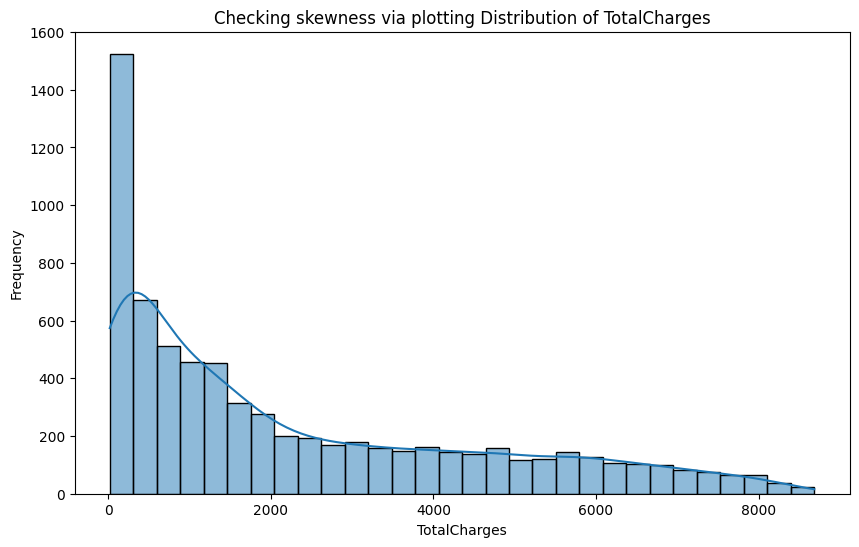

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['TotalCharges'],bins = 30, kde = True)
plt.title("Checking skewness via plotting Distribution of TotalCharges")
plt.xlabel("TotalCharges")
plt.ylabel("Frequency")
plt.show()

This histogram illustrates the distribution of "TotalCharges," showing a right-skewed pattern with most charges concentrated at the lower end and fewer instances of higher charges.


Calculate skewness

In [14]:
skewness = df['TotalCharges'].skew()
print("Skewness:", skewness)

Skewness: 0.961642499724251


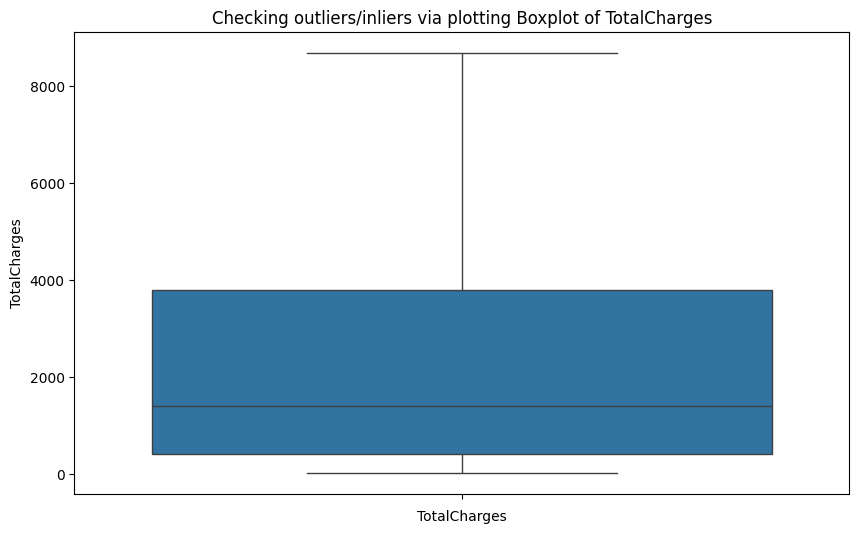

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(df['TotalCharges'])
plt.title("Checking outliers/inliers via plotting Boxplot of TotalCharges")
plt.xlabel("TotalCharges")
plt.show()


The boxplot suggests a slight right skewness because The median  is closer to the lower quartile (Q1) than to the upper quartile (Q3).The tail extends beyond the upper whisker, reinforcing the right-skewed pattern whereas in terms of outliers the data distribution is right-skewed, with some high charges as potential outliers

In [17]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
for column in df.select_dtypes(include='object').columns:
  print(f"Value counts for column '{column}':")
  print(df[column].value_counts())
  print("\n")

Value counts for column 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


Value counts for column 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64


Value counts for column 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Value counts for column 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Value counts for column 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Value counts for column 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Value counts for column 'InternetService':
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Value counts for column 'Onl

In [21]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [22]:
df['Churn'].dtype

dtype('int64')

*2.3 Analyzing all the object datatype columns w.r.t our target/label variable via bar charts*

In [23]:
def plot_categorical_vs_churn(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='Churn')
    plt.title(f'Churn vs {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.show()

In [24]:
categorical_vars = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

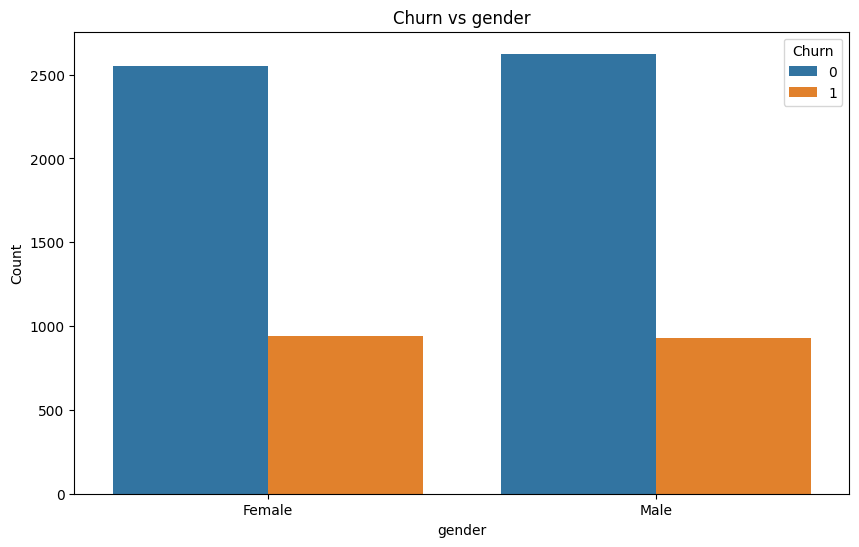

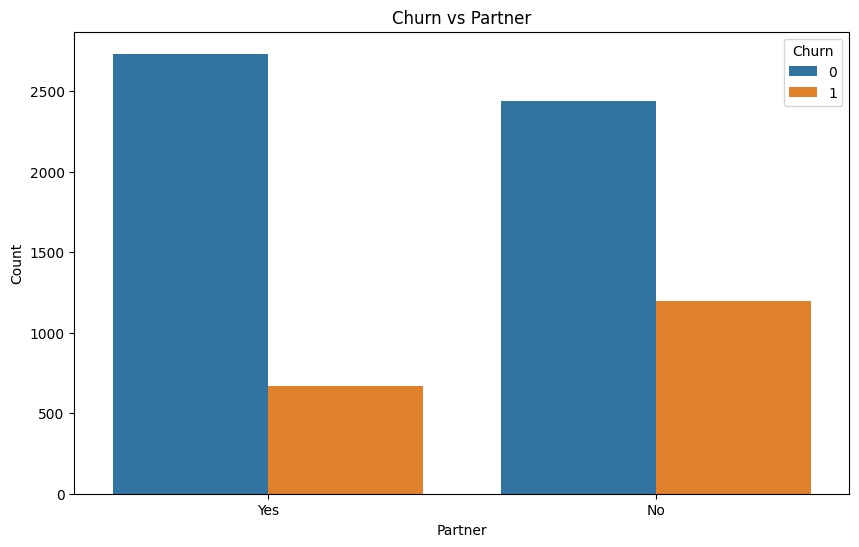

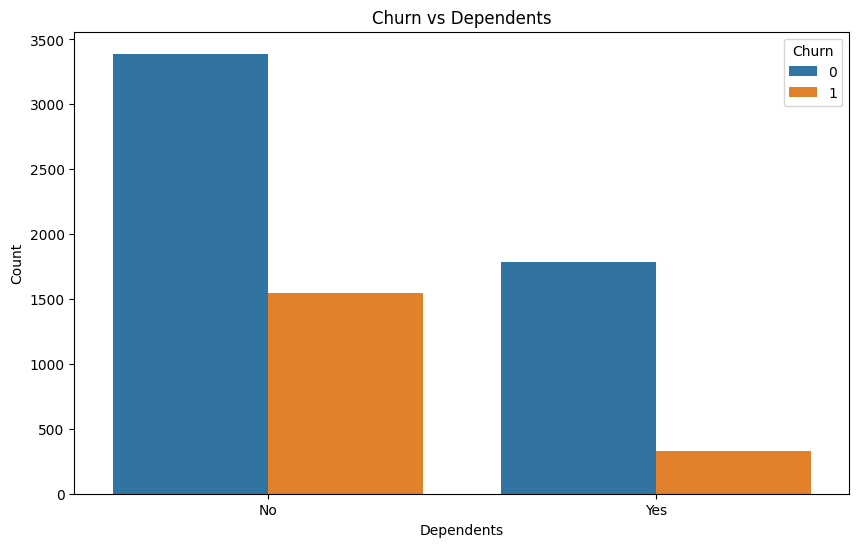

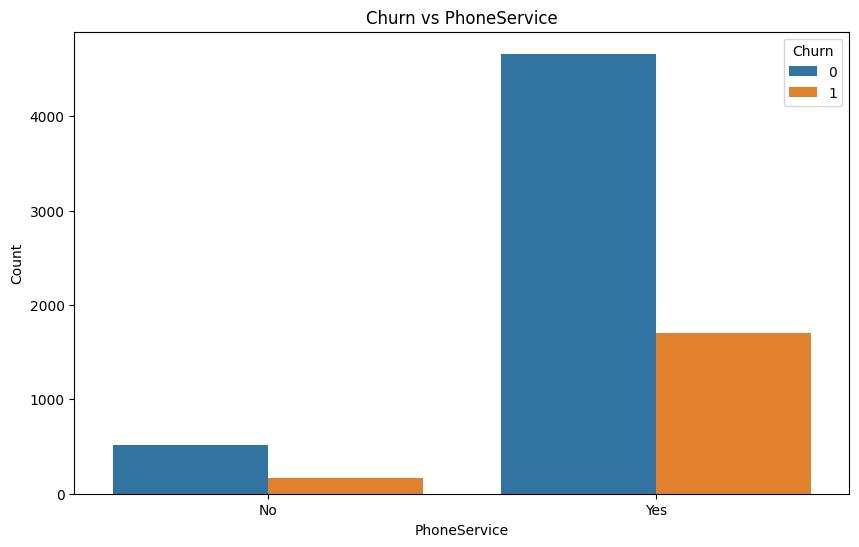

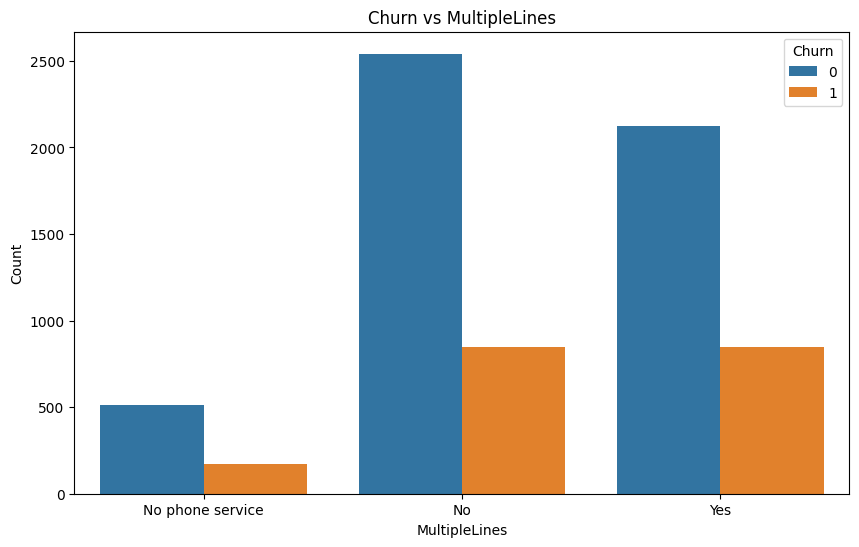

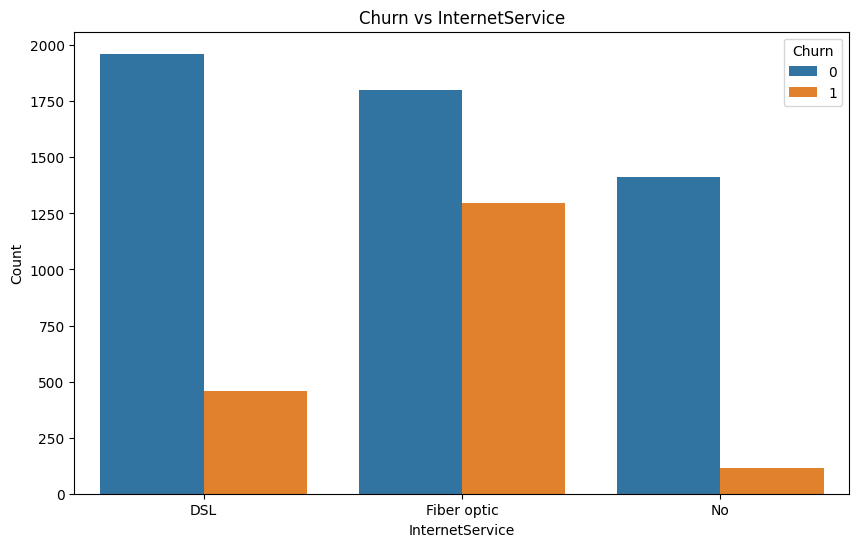

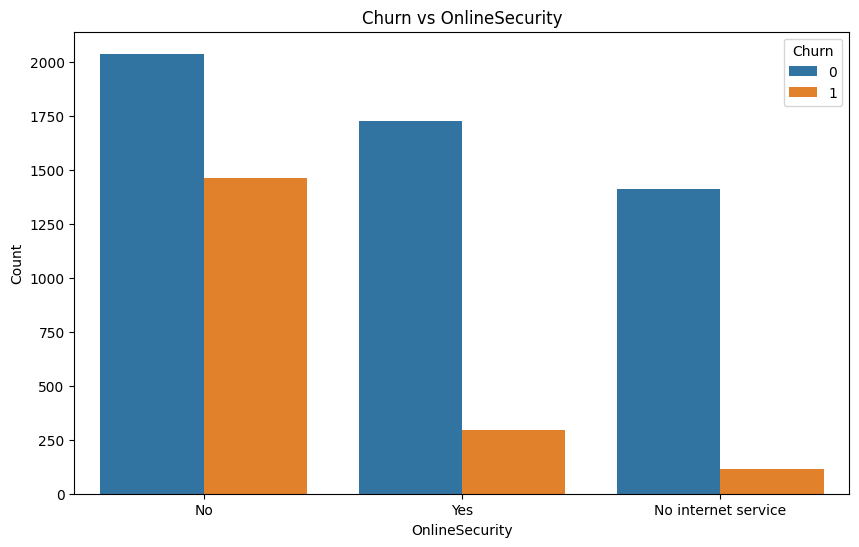

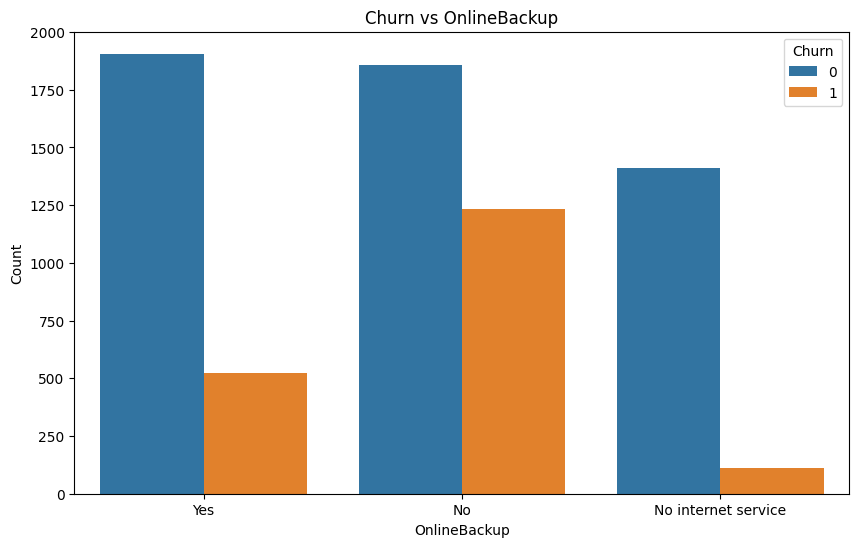

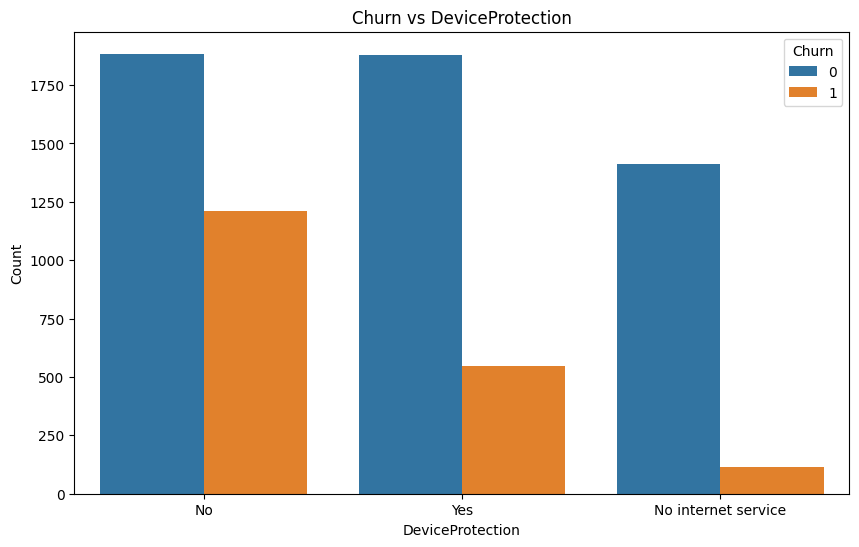

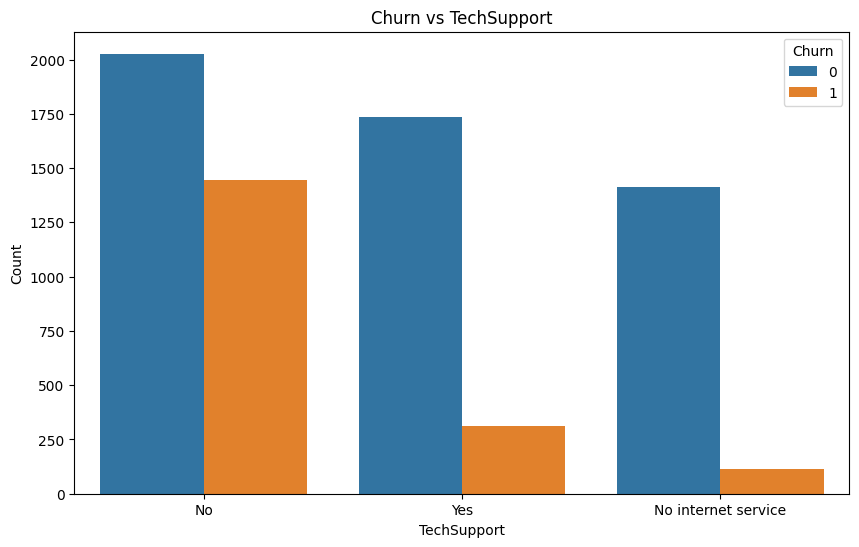

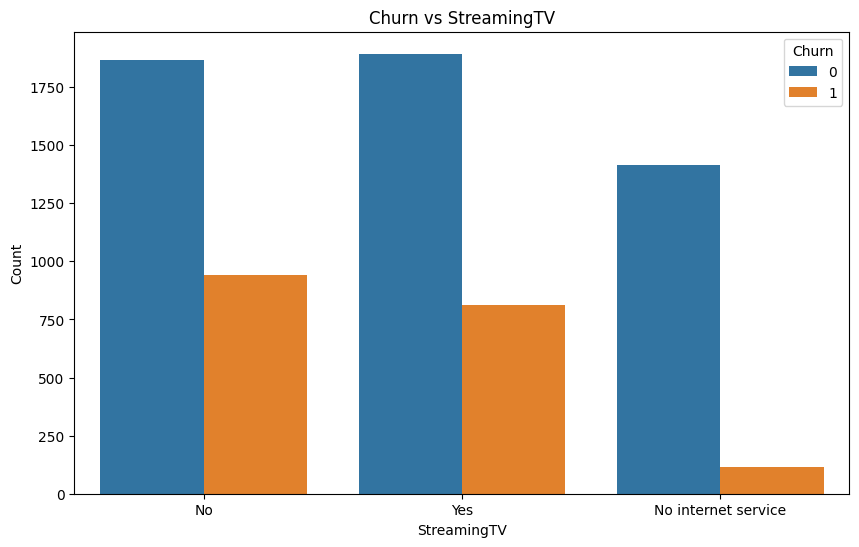

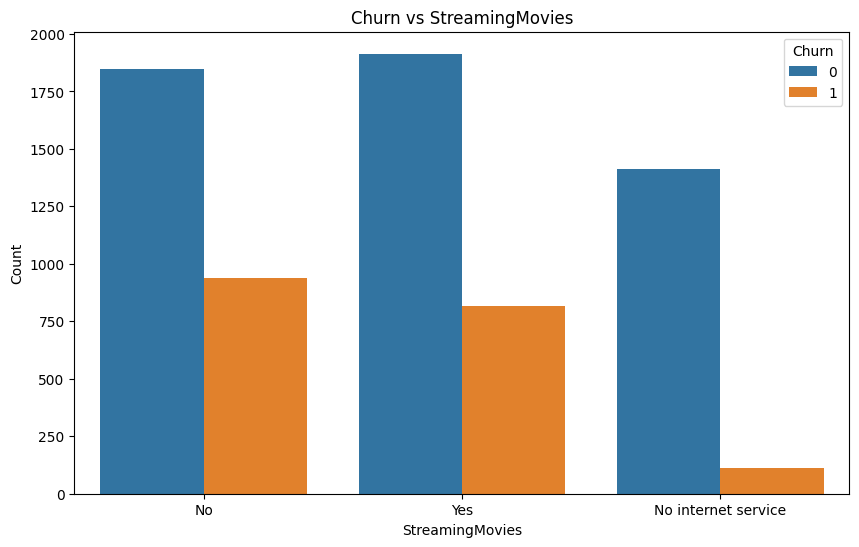

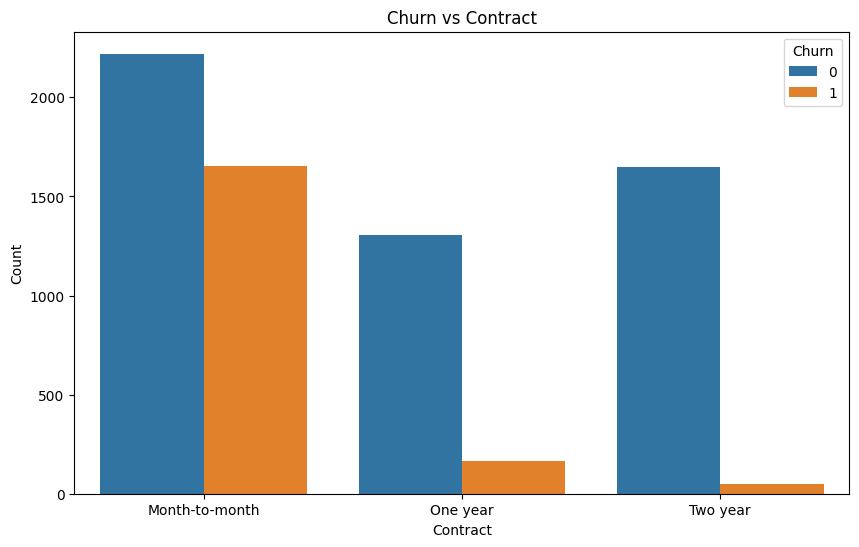

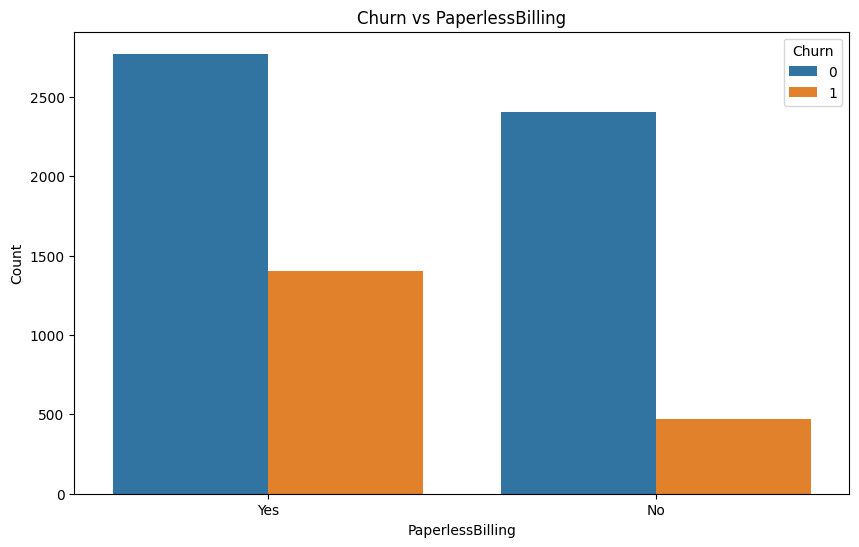

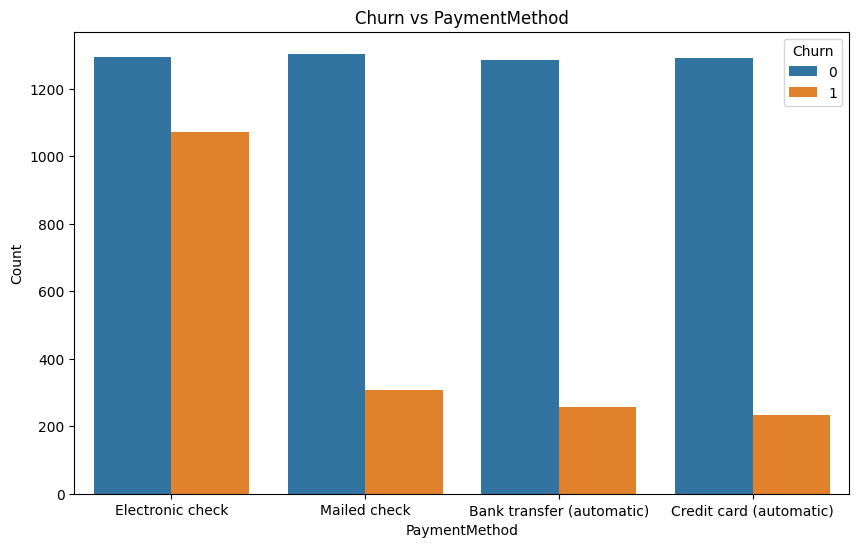

In [25]:
for var in categorical_vars:
    plot_categorical_vs_churn(var)

*2.4 Statistical Analysis*

In [30]:
def chi_square_test(column):
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test for {column}')
    print(f'Chi2 Statistic: {chi2}, p-value: {p}')
    print('-'*50)

In [31]:
for var in categorical_vars:
    chi_square_test(var)

Chi-square test for gender
Chi2 Statistic: 0.4840828822091383, p-value: 0.48657873605618596
--------------------------------------------------
Chi-square test for Partner
Chi2 Statistic: 158.7333820309922, p-value: 2.1399113440759935e-36
--------------------------------------------------
Chi-square test for Dependents
Chi2 Statistic: 189.12924940423474, p-value: 4.9249216612154196e-43
--------------------------------------------------
Chi-square test for PhoneService
Chi2 Statistic: 0.9150329892546948, p-value: 0.3387825358066928
--------------------------------------------------
Chi-square test for MultipleLines
Chi2 Statistic: 11.33044148319756, p-value: 0.0034643829548773
--------------------------------------------------
Chi-square test for InternetService
Chi2 Statistic: 732.309589667794, p-value: 9.571788222840544e-160
--------------------------------------------------
Chi-square test for OnlineSecurity
Chi2 Statistic: 849.9989679615965, p-value: 2.661149635176552e-185
----------

*2.4.1 Analyzing chi-square test results via graph*

In [32]:
def plot_categorical_vs_churn_pie(column):
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    plt.figure(figsize=(14, 7))
    # Plotting pie charts for each category
    for i, category in enumerate(df[column].unique()):
        plt.subplot(1, len(df[column].unique()), i + 1)
        sizes = df[df[column] == category]['Churn'].value_counts()
        plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'{category} (p-value: {p:.4f})')

    plt.suptitle(f'Churn Distribution by {column}')
    plt.show()

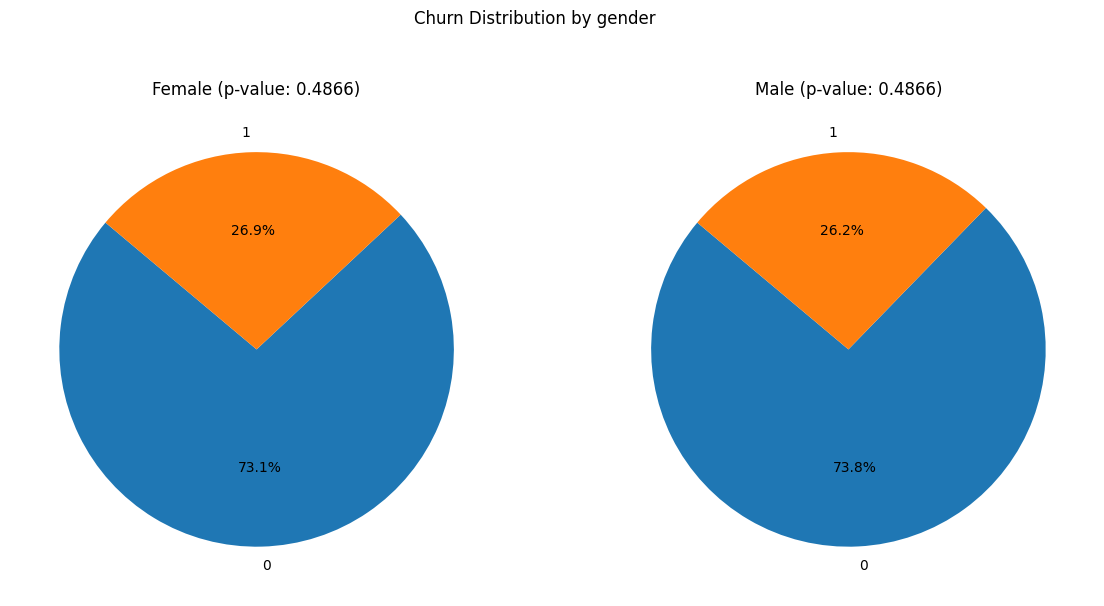

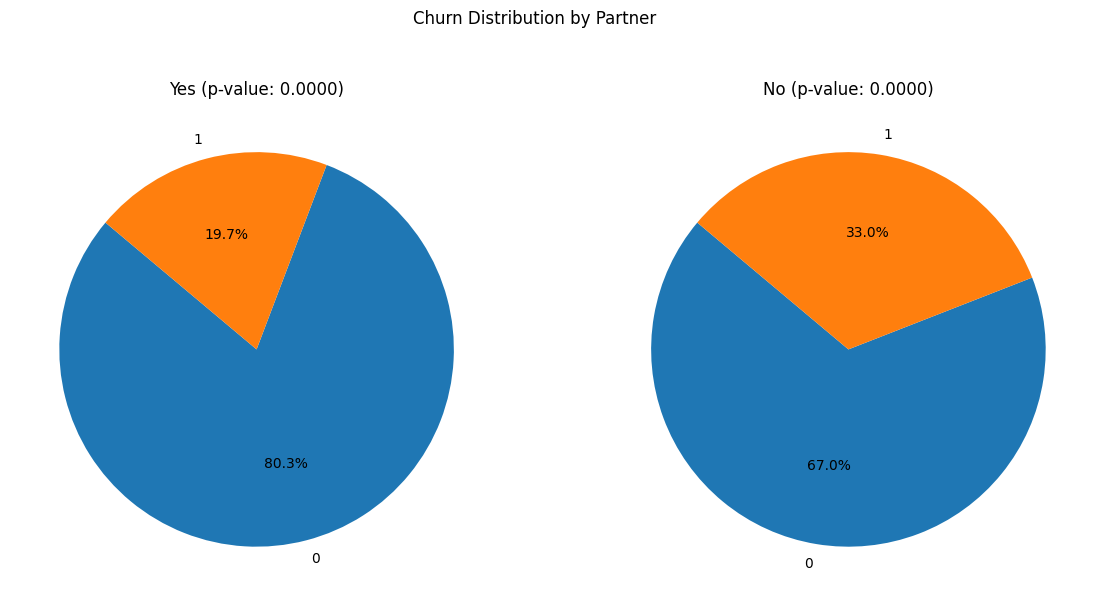

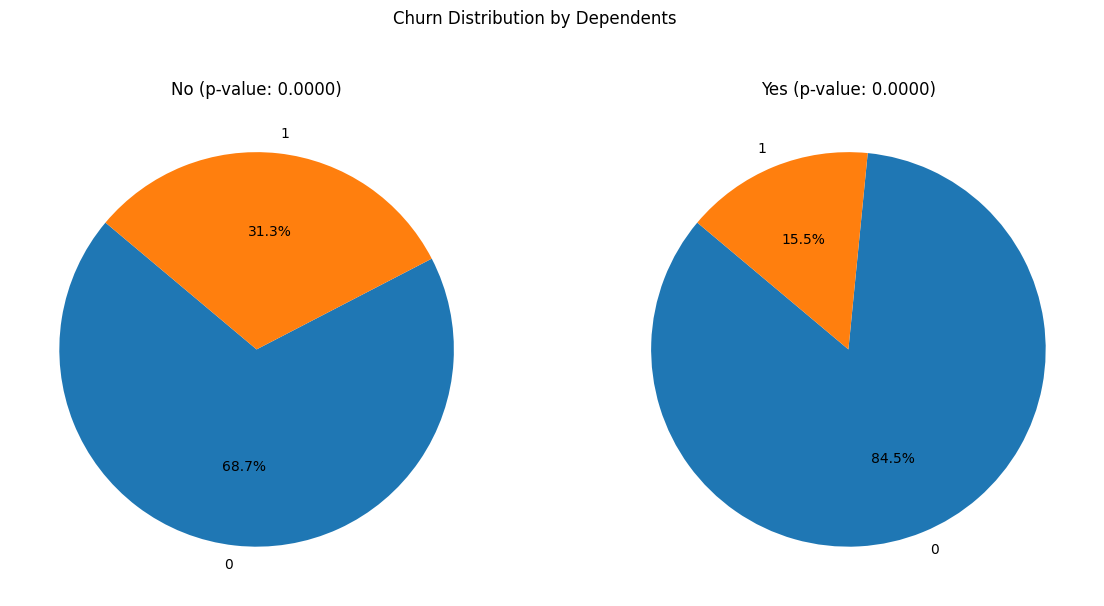

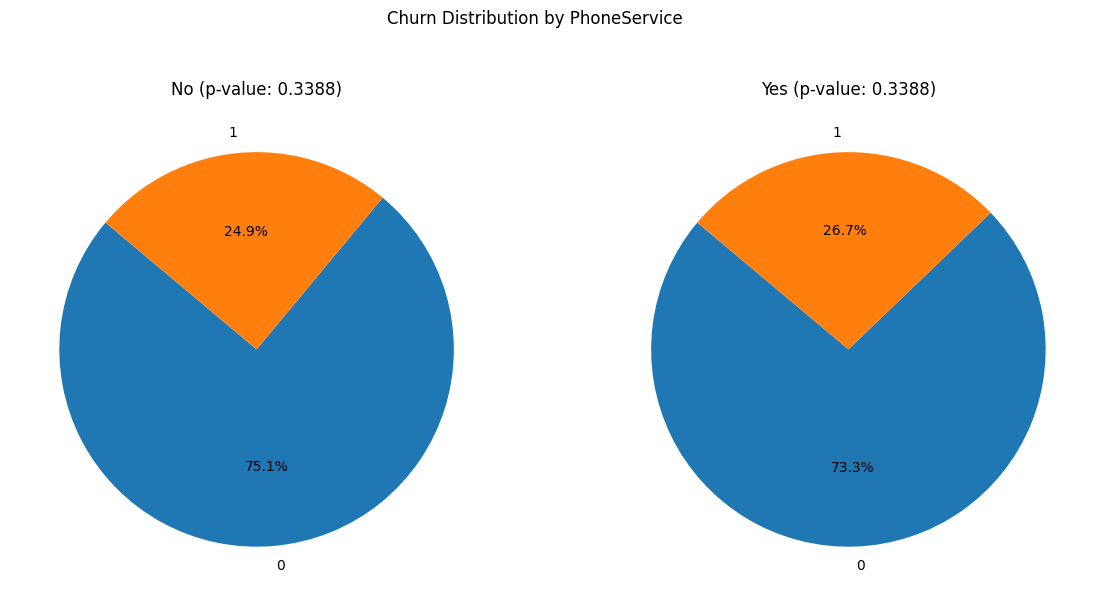

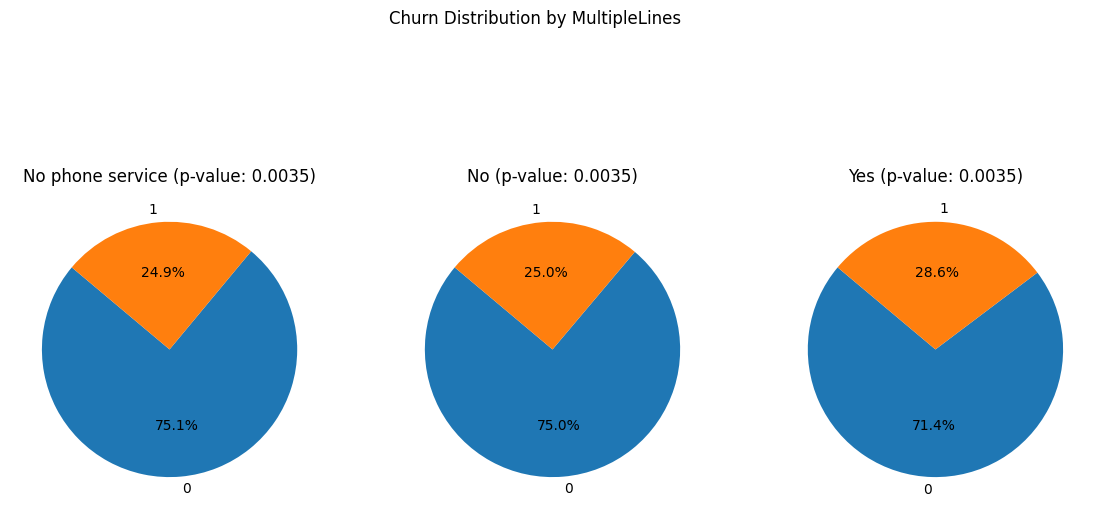

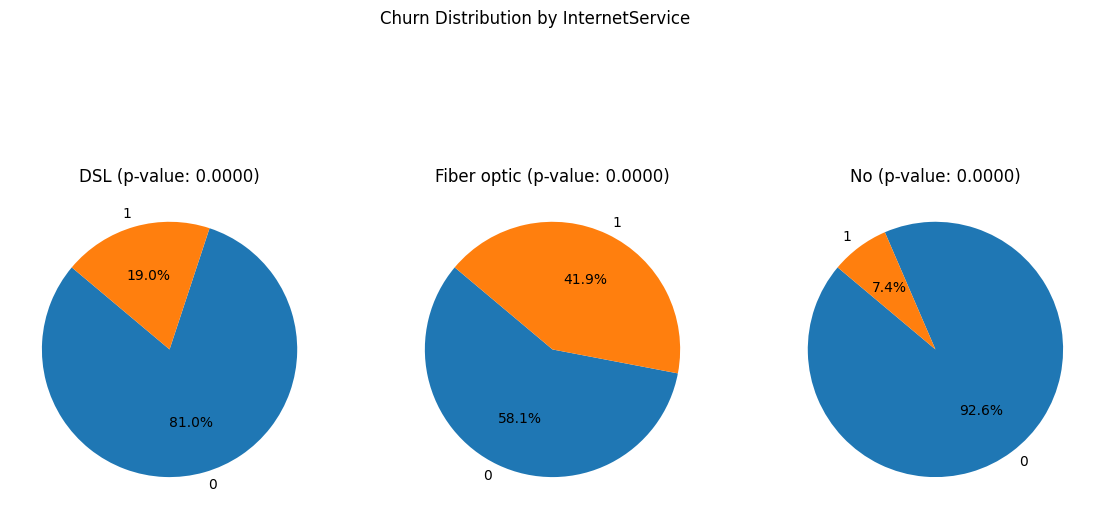

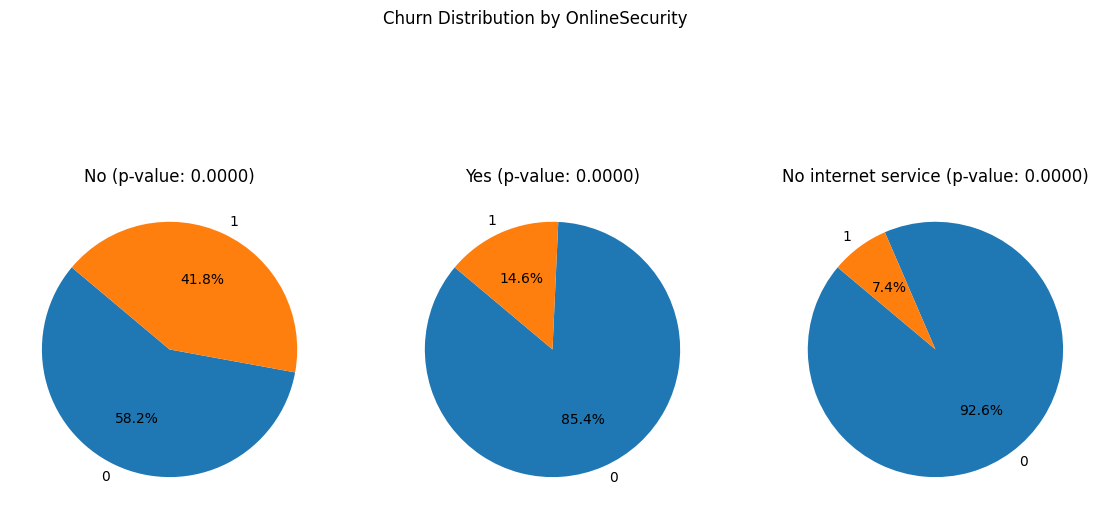

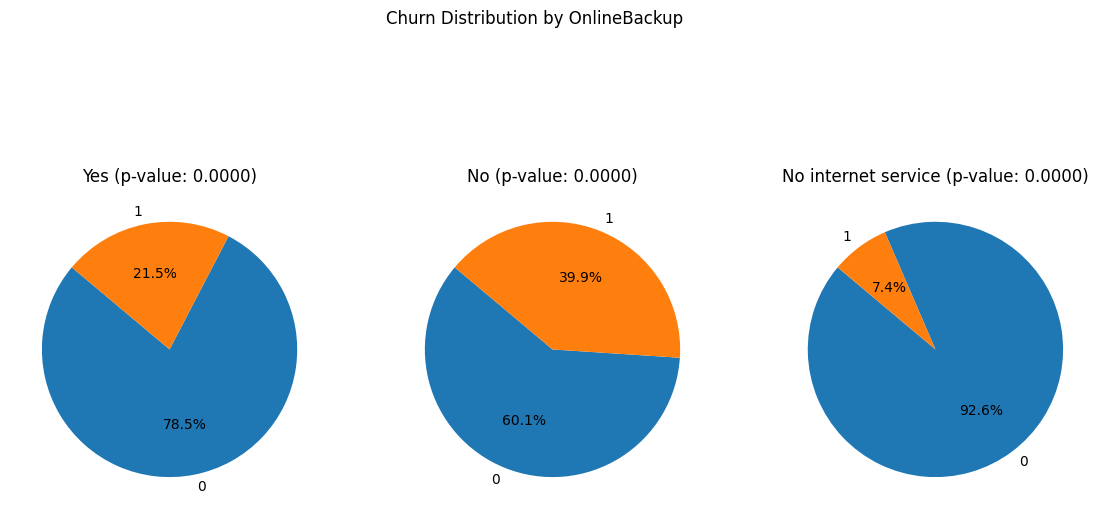

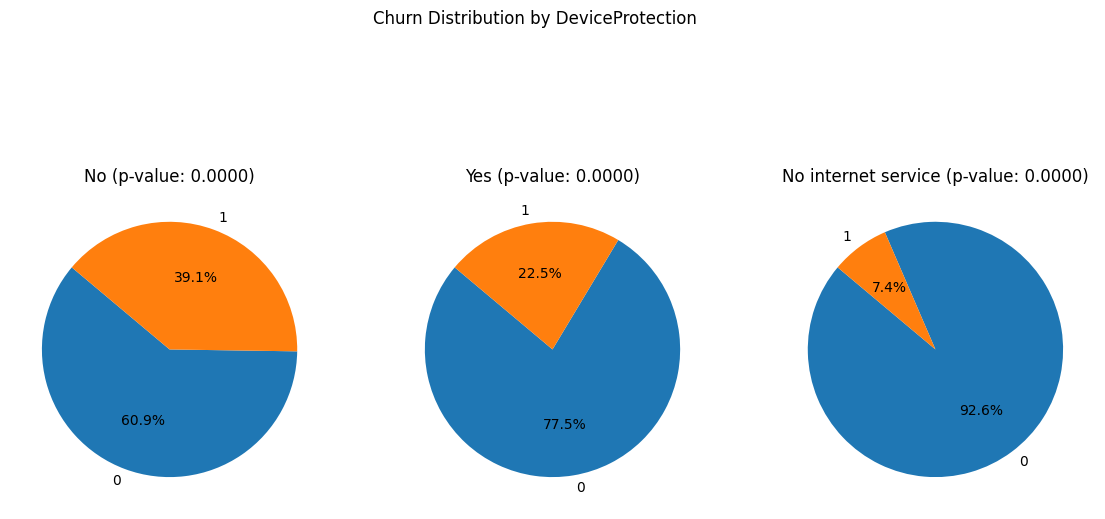

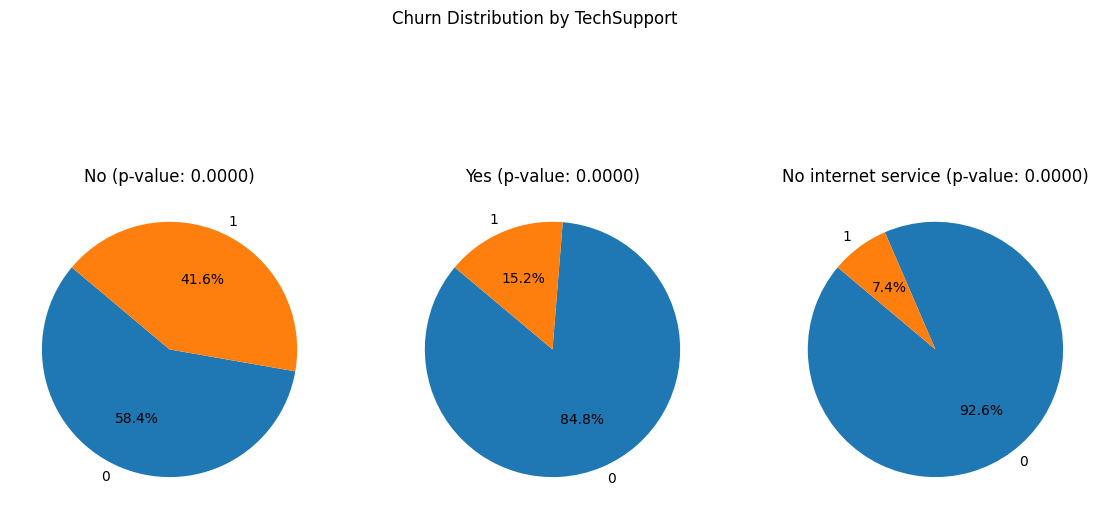

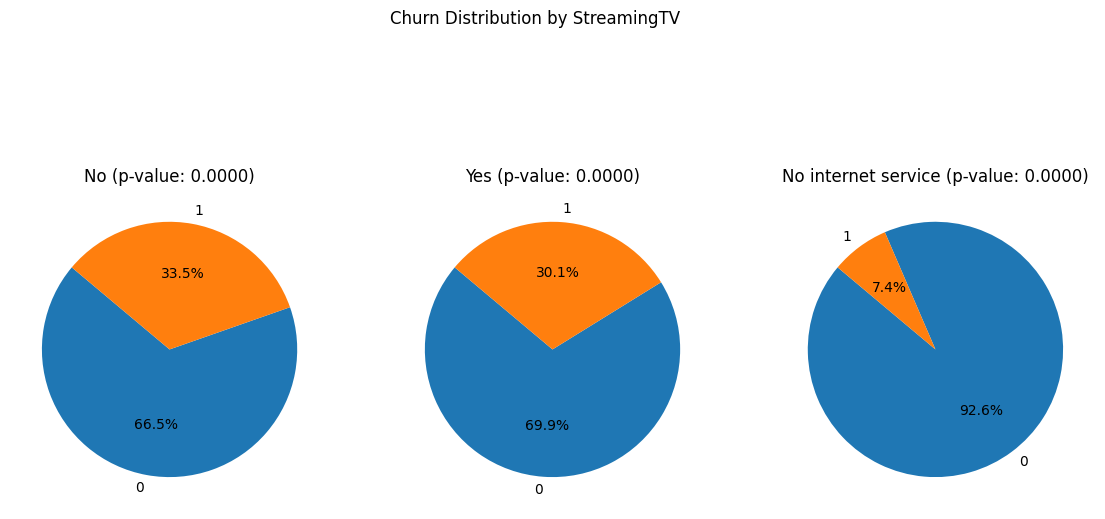

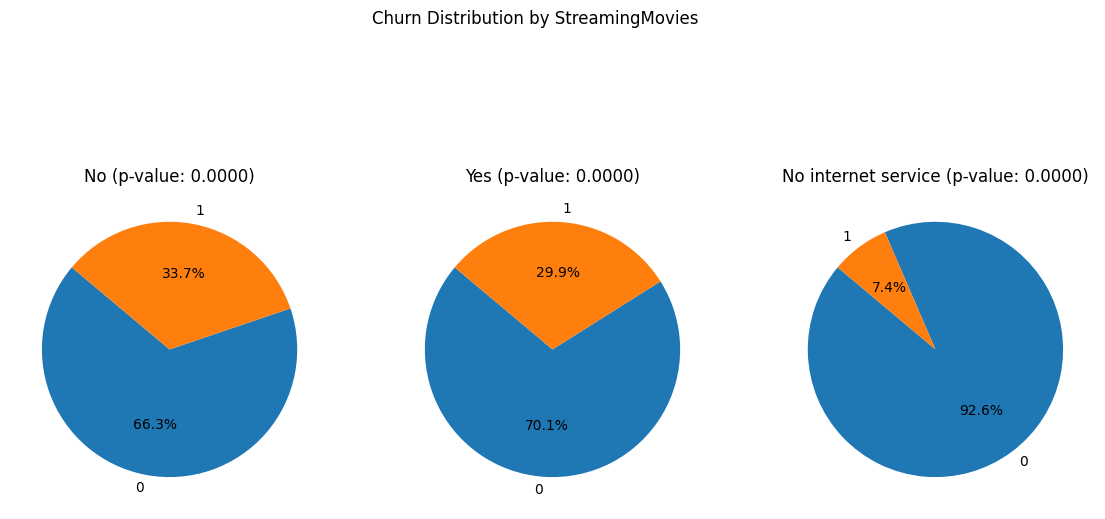

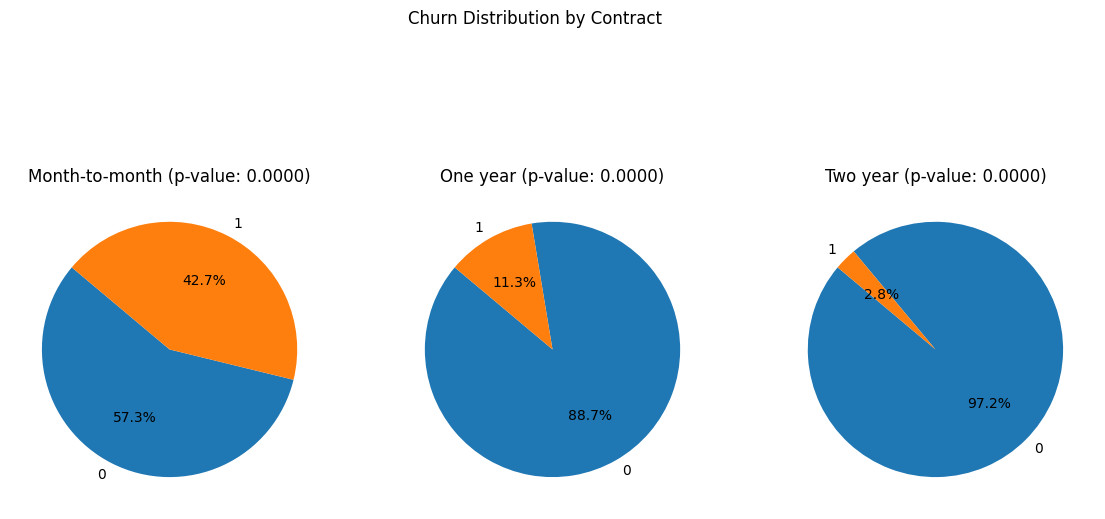

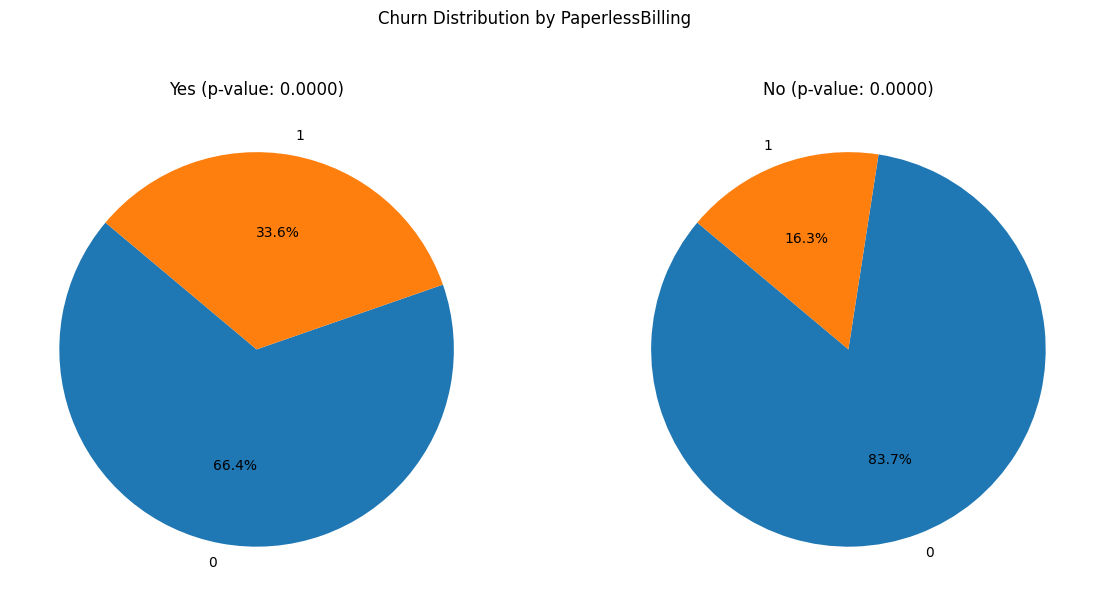

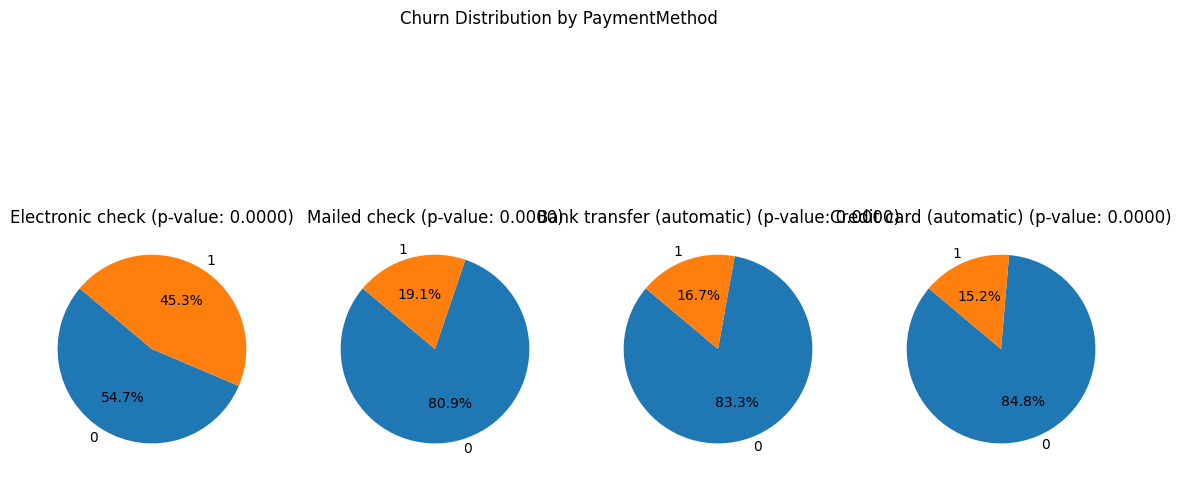

In [33]:
for var in categorical_vars:
    plot_categorical_vs_churn_pie(var)

*   Pie charts show the proportion of churned and non-churned customers for each category.
*   Each subplot represents a different category within the variable, and the title includes the p-value from the chi-square test.

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### *3. Encoding all the categorical columns*

In [35]:
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

In [36]:
cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


*3.1 Binary columns*

In [45]:
binary_cols = [ 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

*3.2 Columns that have 'No internet service'*

In [47]:
no_internet_service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

*3.3 other categorical columns*

In [40]:
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']

*3.4 Binary encoding for binary categorical features*

In [41]:
cat_features[binary_cols] = cat_features[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
cat_features['gender'] = cat_features['gender'].map({'Male': 1, 'Female': 0})


In [42]:
cat_features[no_internet_service_cols] = cat_features[no_internet_service_cols].replace({'No internet service': 'No'})

*3.5 One-hot encode the columns*

In [43]:
cat_features = pd.get_dummies(cat_features, columns=no_internet_service_cols + multi_cat_cols, drop_first=True)

In [48]:
(cat_features.head())

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,1,0,0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,1,1,1,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0,0,True,False,True,False,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,1,1,1,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [49]:
numerical_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]

In [50]:
churnDF = pd.merge(cat_features, numerical_features, left_index=True, right_index=True)

In [51]:
churnDF.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure
0,0,1,0,0,1,0,True,False,False,True,...,False,False,False,True,False,7590-VHVEG,29.85,29.85,0,1
1,1,0,0,1,0,0,False,False,True,False,...,True,False,False,False,True,5575-GNVDE,1889.50,56.95,0,34
2,1,0,0,1,1,1,False,False,True,True,...,False,False,False,False,True,3668-QPYBK,108.15,53.85,0,2
3,1,0,0,0,0,0,True,False,True,False,...,True,False,False,False,False,7795-CFOCW,1840.75,42.30,0,45
4,0,0,0,1,1,1,False,False,False,False,...,False,False,False,True,False,9237-HQITU,151.65,70.70,0,2


### *4. Correlation and Selection of relevant Features*

In [52]:
correlationMatrix = churnDF.drop(['customerID'],axis=1).corr()

In [53]:
print(correlationMatrix)

                                         gender   Partner  Dependents  \
gender                                 1.000000 -0.001808    0.010517   
Partner                               -0.001808  1.000000    0.452676   
Dependents                             0.010517  0.452676    1.000000   
PhoneService                          -0.006488  0.017706   -0.001762   
PaperlessBilling                      -0.011754 -0.014877   -0.111377   
Churn                                 -0.008612 -0.150448   -0.164221   
MultipleLines_No phone service         0.006488 -0.017706    0.001762   
MultipleLines_Yes                     -0.008414  0.142057   -0.024526   
OnlineSecurity_Yes                    -0.017021  0.143106    0.080972   
OnlineBackup_Yes                      -0.013773  0.141498    0.023671   
DeviceProtection_Yes                  -0.002105  0.153786    0.013963   
TechSupport_Yes                       -0.009212  0.119999    0.063268   
StreamingTV_Yes                       -0.008393  0.

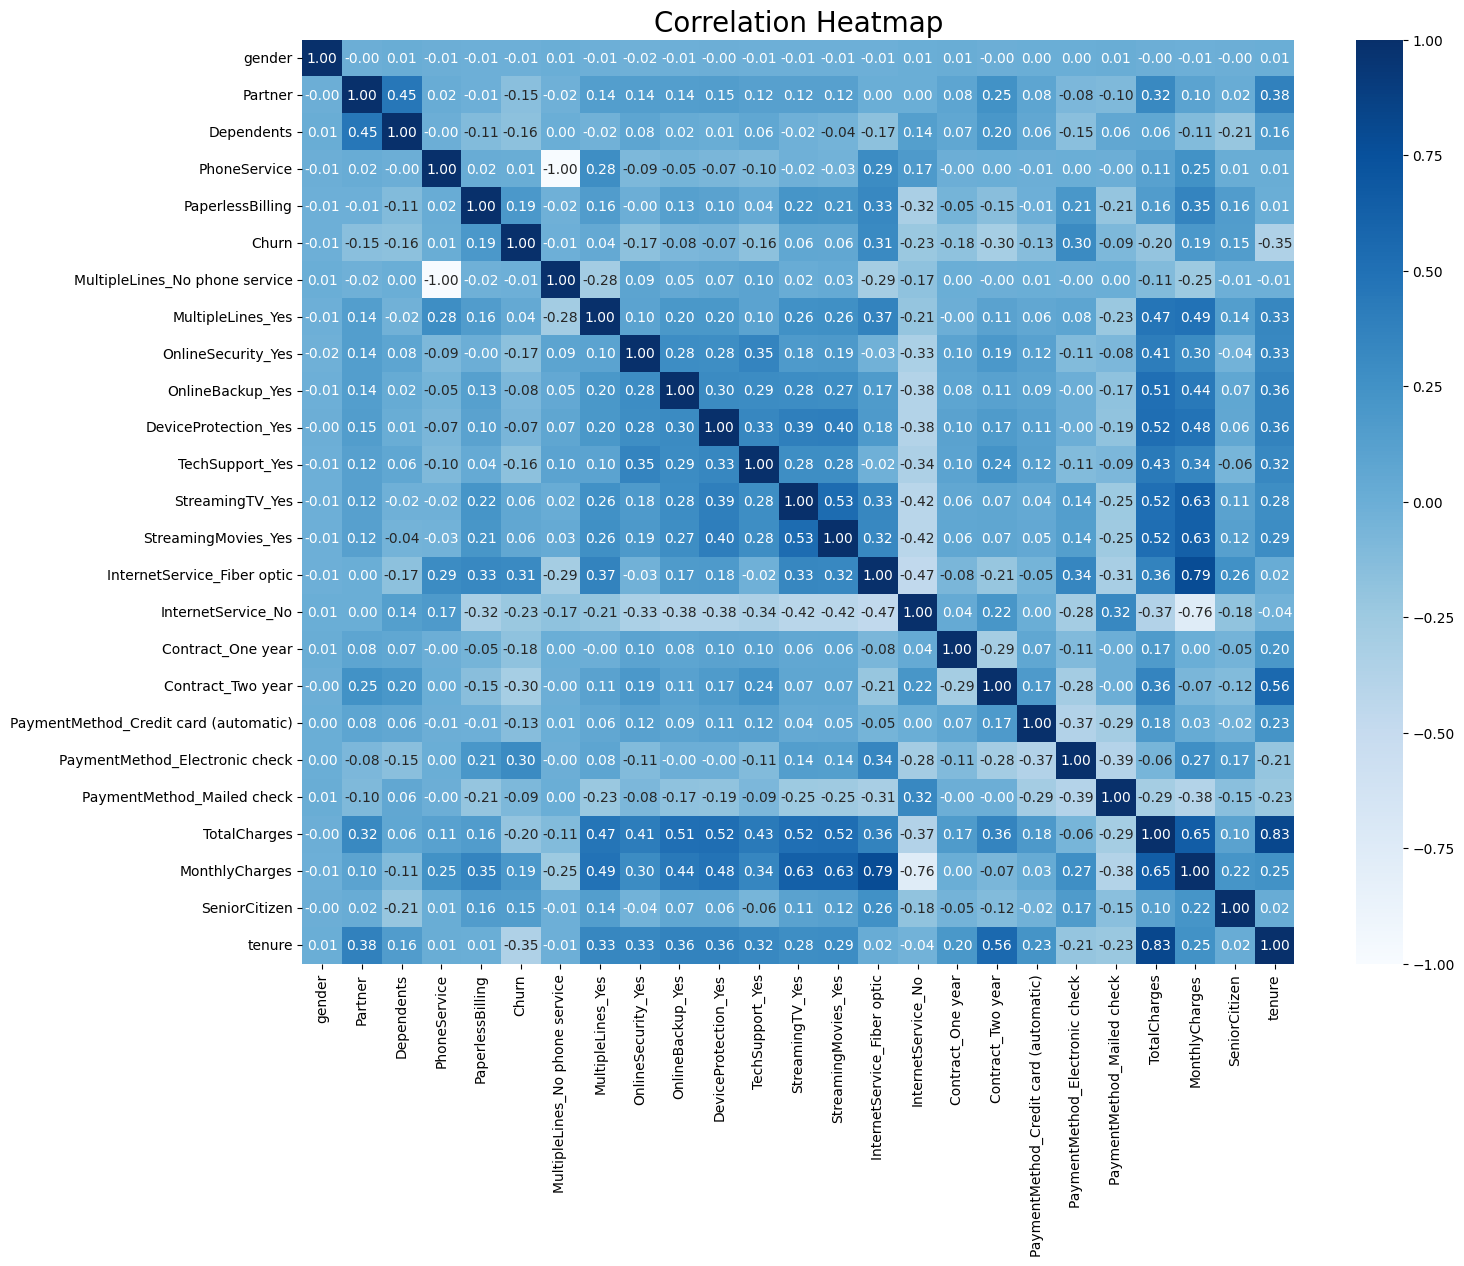

In [54]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlationMatrix, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


*4.1 Extracting *italicized text* correlation of each feature with the target variable*

In [55]:
correlation_with_target = correlationMatrix['Churn'].sort_values(ascending=False)
print(correlation_with_target)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


*4.2 Selecting relevant features*

In [56]:
relevant_features = correlation_with_target[abs(correlation_with_target) > 0.1].index.tolist()
relevant_features.remove('Churn') # Removing 'Churn' from the list as it is the target variable
boolean_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
selected_boolean_features = [feature for feature in boolean_features if feature in relevant_features]
final_features = list(set(relevant_features + selected_boolean_features)) # Combining selected boolean features with other relevant features

print(final_features)

['Contract_Two year', 'Partner', 'OnlineSecurity_Yes', 'MonthlyCharges', 'PaymentMethod_Credit card (automatic)', 'Contract_One year', 'TotalCharges', 'SeniorCitizen', 'InternetService_No', 'tenure', 'TechSupport_Yes', 'PaperlessBilling', 'Dependents', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic']


In [58]:
final_df = churnDF[final_features + ['Churn']]
final_df.head()

,Contract_Two year,Partner,OnlineSecurity_Yes,MonthlyCharges,PaymentMethod_Credit card (automatic),Contract_One year,TotalCharges,SeniorCitizen,InternetService_No,tenure,TechSupport_Yes,PaperlessBilling,Dependents,PaymentMethod_Electronic check,InternetService_Fiber optic,Churn
0,False,1,False,29.85,False,False,29.85,0,False,1,False,1,0,True,False,0
1,False,0,True,56.95,False,True,1889.50,0,False,34,False,0,0,False,False,0
2,False,0,True,53.85,False,False,108.15,0,False,2,False,1,0,False,False,1
3,False,0,True,42.30,False,True,1840.75,0,False,45,True,0,0,False,False,0
4,False,0,False,70.70,False,False,151.65,0,False,2,False,1,0,True,True,1


In [59]:
final_df.shape

(7043, 16)

# **Churn Prediction Model**

In [60]:
X = final_df.drop('Churn',axis=1)
y = final_df['Churn']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

*Using SMOTE to imblance Churn Variable*

In [61]:
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

## Checking Accuracy of different models to find the best suitable Model

### *Model 1: Logistic Regression*

In [70]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Making predictions
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy of Logistic Regression Model:", (accuracy_log_reg))


Accuracy of Logistic Regression Model: 0.7537260468417317


### *Model 2: Random Forest Classifier*

In [71]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Making predictions
y_pred_rf = random_forest.predict(X_test)


accuracyRF = accuracy_score(y_test, y_pred_rf)
print("Accuracy of RandomForest Classifier:", (accuracyRF))


Accuracy of RandomForest Classifier: 0.7665010645848119


### *Model 3: Gradient Boost*

In [72]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Making predictions
y_pred_gb = gb.predict(X_test)

accuracyGB=accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boost:", (accuracyGB))

Accuracy of Gradient Boost: 0.7672107877927609


In [74]:
accuracy = [accuracy_log_reg,accuracyRF,accuracyGB]
accuracy = [round(a, 4) for a in accuracy]

In [76]:
accuaracies = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boost'],
    'Accuracy': accuracy
}
accuracy_df = pd.DataFrame(accuaracies)
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.7537
1,Random Forest,0.7665
2,Gradient Boost,0.7672


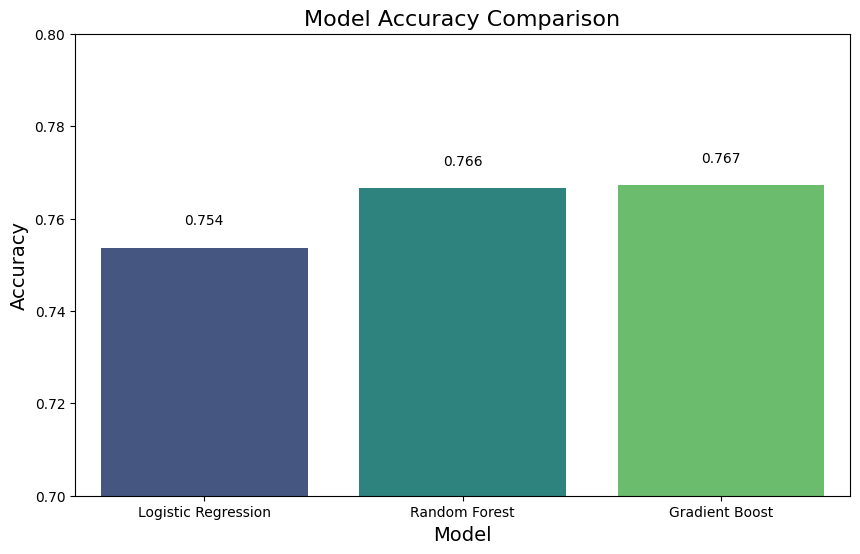

In [79]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
for index, row in accuracy_df.iterrows():
    bar_plot.text(index, row['Accuracy'] + 0.005, round(row['Accuracy'], 3), color='black', ha="center")

plt.ylim(0.70, 0.80)
plt.show()

## *Model Evaluation*

In [82]:
print("Gradient Boosting")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.54      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



In [83]:
accuracyGB=accuracy_score(y_test, y_pred_gb)
print("Accuracy:", round(accuracyGB,4))

Accuracy: 0.7672


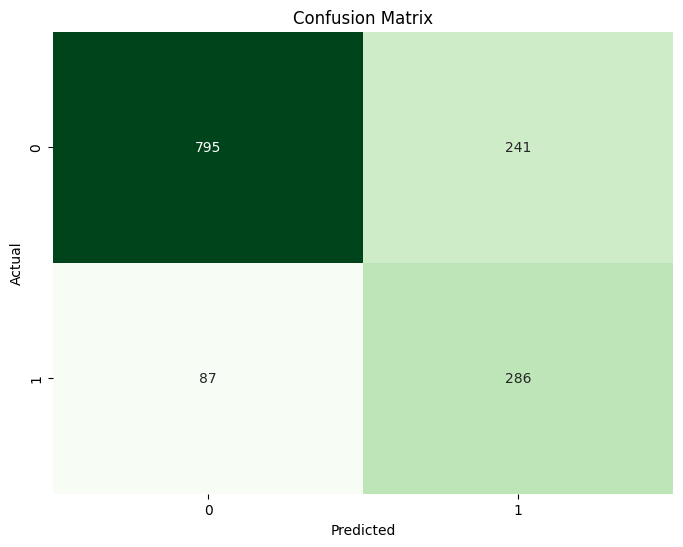

In [84]:
conf_matrix = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.3}
Tuned Gradient Boosting
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1036
           1       0.55      0.59      0.57       373

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.76      0.76      1409

Accuracy: 0.7615330021291696


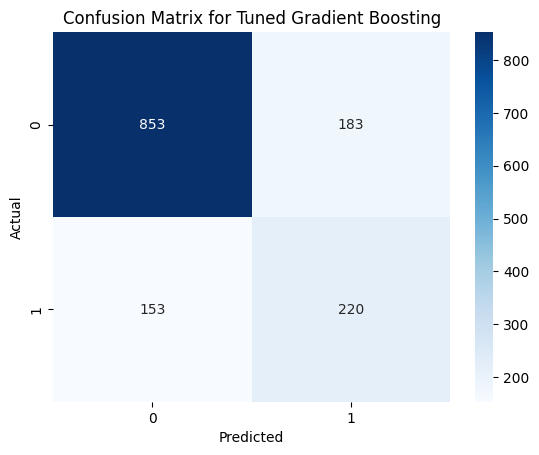

In [86]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Evaluate the tuned model
y_pred_random_search = random_search.best_estimator_.predict(X_test)
print("Tuned Gradient Boosting")
print(classification_report(y_test, y_pred_random_search))
print("Accuracy:", accuracy_score(y_test, y_pred_random_search))

# Plot confusion matrix for the tuned model
conf_matrix_random_search = confusion_matrix(y_test, y_pred_random_search)
sns.heatmap(conf_matrix_random_search, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Tuned Gradient Boosting')
plt.show()
